### Regular EDA

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score , confusion_matrix , classification_report ,precision_score , recall_score , f1_score , RocCurveDisplay


##### Load Data

In [2]:
df = pd.read_csv('./data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

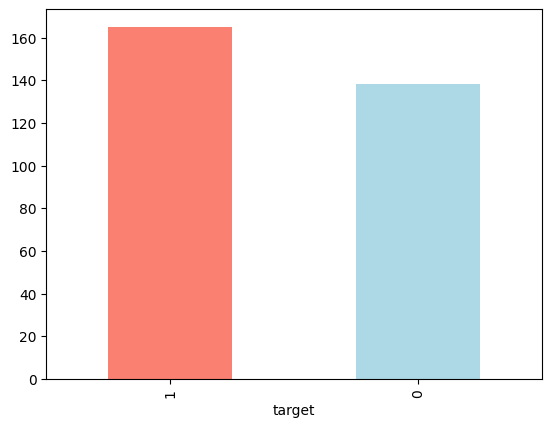

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

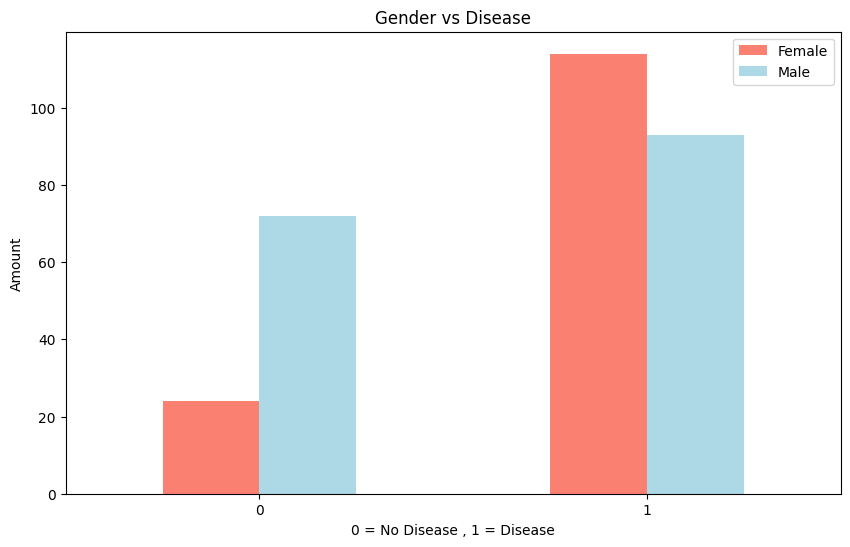

In [16]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])
plt.title('Gender vs Disease')
plt.xlabel('0 = No Disease , 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

### Avg vs Max Heart Rate 

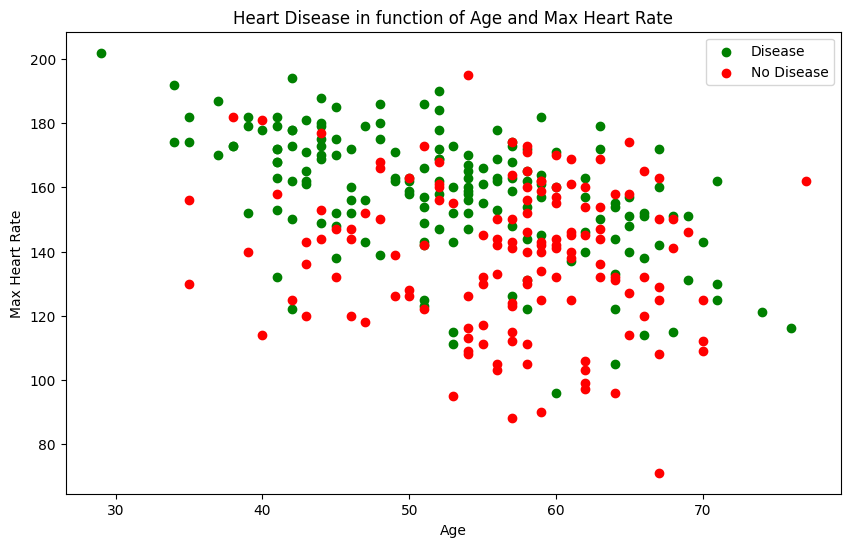

In [21]:
plt.figure(figsize=(10,6))
# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='g')
# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='r')
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

### cp -chest pain 
###### level 0 ,1 ,2 3 

In [22]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


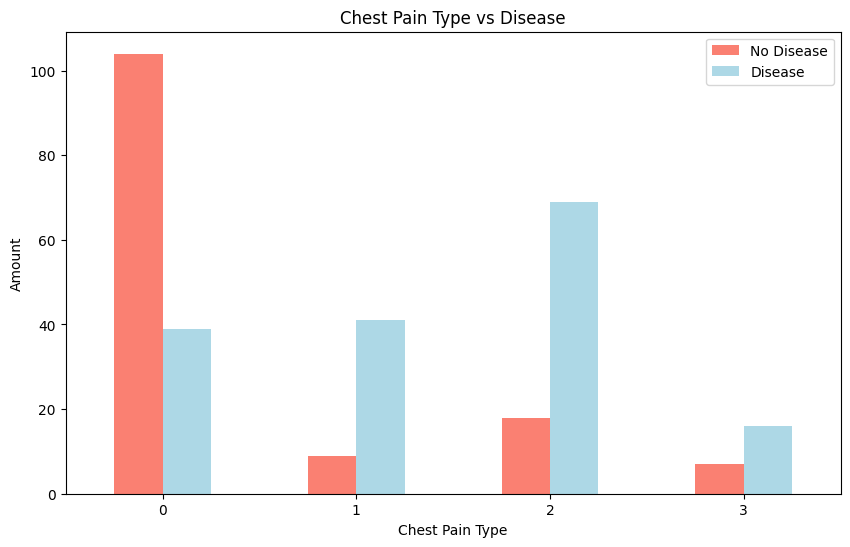

In [23]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])
plt.title('Chest Pain Type vs Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()
### cp -chest pain

### Modeling

### Try 3 Machine Learning Model
###### 1. Logistric Regression
###### 2. K-Nearest Neighbours Classification
###### 3. Random Forest Classification

In [24]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model ={
    'Logistic Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor()}
for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'----{name}----')
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('R2 Score:', r2_score(y_test, y_pred))
    print()

----Logistic Regression----
Mean Squared Error: 0.11627071992880013
R2 Score: 0.5337894947682487

----KNN----
Mean Squared Error: 0.20524590163934425
R2 Score: 0.17702586206896564

----Random Forest----
Mean Squared Error: 0.12594426229508196
R2 Score: 0.4950015086206897



In [26]:
models ={
    'Logistic Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor()}
def evaluate_model(models ,X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_score = evaluate_model(models, X_train, X_test, y_train, y_test)

In [29]:
model_score

{'Logistic Regression': 0.5337894947682487,
 'KNN': 0.17702586206896564,
 'Random Forest': 0.5300502155172415}

 Precision  TP / TP+FP   i.e 10 patient and 8 has decease then 8/10 = 80%
 Recall    TP / TP+FN  20 case of decease and 15 has the 15/20 = 75%
***F1 score balance between Precision and Recall by providing the single vale , its the hamonic mean of Precision and recall***

Formula  F1  = 2* (pre * recall)/(pre + recall)

Model's first predictions aren't  always what we should based 
Lets looks :
- Hypyterparameter tuning
- Feature importance 
- Confusion Matrix 
- Cross-validation
- Precission
- Recall
- F1 Score
- Classification report 
- ROC curve
- AUC - Area under the curve

### Hypyterparameter tuning (by Hand)

[1.0, 0.5868455542526041, 0.3990480789128785, 0.36670518038214805, 0.32760157273918733, 0.30213530768818075, 0.30672496631956236, 0.2777622094226392, 0.2401544125349051, 0.23495481823825626, 0.22039042560529765, 0.20475883899350833, 0.18193888717233075, 0.18076012911890293, 0.16645742797360374, 0.17316944885148655, 0.16262975778546707, 0.15988322828818557, 0.1712171990116591, 0.16738945988825282]


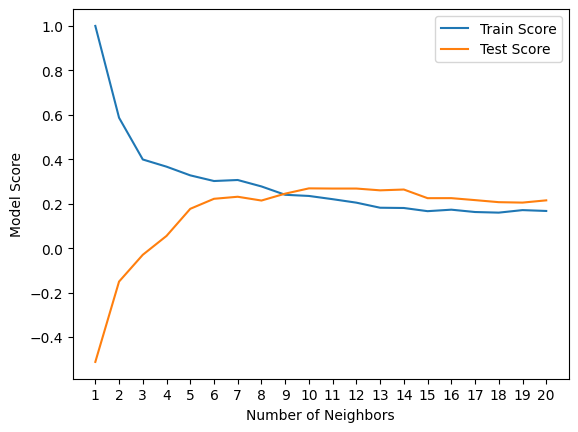

In [31]:
train_scroe = []
test_score = []
neighbors =range(1,21)
knn = KNeighborsRegressor()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scroe.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test)) 

print(train_scroe)
plt.plot(neighbors, train_scroe, label='Train Score')
plt.plot(neighbors, test_score, label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()


Hyperparameter tuning  with RandomizedSearchCV
 We are tune 
- Logistic Regression
- RandomForest classifier

using RandomizeSearchCV

In [32]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear']} 
# create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2,20,2),
           'min_samples_leaf' : np.arange(1,20,2)}

rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

Lets tune  by using RandomizeSearchCv

In [41]:
np.random.seed(42)
# Lets tune  by using RandomizeSearchCv
rs_log_reg = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions=rf_grid, 
                                cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [42]:

rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [ ]:
y_preds = rs_log_reg.predict(X_test)
print(classification_report(y_test, y_preds))
model_score = evaluate_model(models, X_train, X_test, y_train, y_test)
from sklearn.metrics import precision_score , recall_score , f1_score , RocCurveDisplay